#                                              Data Analysis for Employees Table

### Install and import dependencies

In [2]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\real\desktop\venv_prj\scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install pandas

You should consider upgrading via the 'c:\users\real\desktop\venv_prj\scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\real\desktop\venv_prj\scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
pip install matplotlib

In [ ]:
pip install numpy

In [6]:
import json 
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys

#### Define path for connection of database

In [7]:
def connect_to_DB():
    connection = psycopg2.connect(user= 'postgres', password= 'admin123', 
                                  host= 'localhost', port= 5432, database= 'employees_db')
    return connection

In [8]:
conn = connect_to_DB()

### 1. Check for data inconsistency.
 

### Department dataframe

In [4]:
department_df = pd.read_sql_query("""SELECT * FROM employees.department""", conn)

C:\Users\REAL\AppData\Local\Temp\ipykernel_6004\3863740090.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  department_df = pd.read_sql_query("""SELECT * FROM employees.department""", conn)


In [5]:
department_df

,id,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


##### Check department data inconsistency.

In [9]:
department_df.info()
print(department_df.columns)
print(department_df.shape)
print("Size of department dataframe :- ",sys.getsizeof(department_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         9 non-null      object
 1   dept_name  9 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes
Index(['id', 'dept_name'], dtype='object')
(9, 2)
Size of department dataframe :-  1305


In [10]:
# Analytical summary of the dataset
department_df.describe(include='all')

,id,dept_name
count,9,9
unique,9,9
top,d001,Marketing
freq,1,1


### Dapartment employee dataframe

In [11]:
demp_df = pd.read_sql_query("""SELECT * FROM employees.department_employee""", conn)

C:\Users\REAL\AppData\Local\Temp\ipykernel_5244\3903272051.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  demp_df = pd.read_sql_query("""SELECT * FROM employees.department_employee""", conn)


In [12]:
demp_df

,employee_id,department_id,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01
...,...,...,...,...
331598,499995,d004,1997-06-02,9999-01-01
331599,499996,d004,1996-05-13,9999-01-01
331600,499997,d005,1987-08-30,9999-01-01
331601,499998,d002,1993-12-27,9999-01-01


##### Check department employee data inconsistency.

In [13]:
demp_df.info()
print(demp_df.columns)
print(demp_df.shape)
print("Size of department employee dataframe :- ",sys.getsizeof(demp_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331603 entries, 0 to 331602
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   employee_id    331603 non-null  int64 
 1   department_id  331603 non-null  object
 2   from_date      331603 non-null  object
 3   to_date        331603 non-null  object
dtypes: int64(1), object(3)
memory usage: 10.1+ MB
Index(['employee_id', 'department_id', 'from_date', 'to_date'], dtype='object')
(331603, 4)
Size of department employee dataframe :-  49408991


In [14]:
# Analytical summary of the dataset
demp_df.describe(include='all')

,employee_id,department_id,from_date,to_date
count,331603.000000,331603,331603,331603
unique,NaN,9,6393,6085
top,NaN,d005,1990-12-28,9999-01-01
freq,NaN,85707,91,240124
mean,253332.605025,NaN,NaN,NaN
std,161831.919445,NaN,NaN,NaN
min,10001.000000,NaN,NaN,NaN
25%,85005.500000,NaN,NaN,NaN
50%,250001.000000,NaN,NaN,NaN
75%,424999.500000,NaN,NaN,NaN


In [15]:
demp_df.nunique()

employee_id      300024
department_id         9
from_date          6393
to_date            6085
dtype: int64

In [16]:
demp_df.isna().sum()

employee_id      0
department_id    0
from_date        0
to_date          0
dtype: int64

### Department manager dataframe

In [17]:
dmgr_df = pd.read_sql_query("""SELECT * FROM employees.department_manager""", conn)

C:\Users\REAL\AppData\Local\Temp\ipykernel_5244\653846055.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dmgr_df = pd.read_sql_query("""SELECT * FROM employees.department_manager""", conn)


In [18]:
dmgr_df

,employee_id,department_id,from_date,to_date
0,110022,d001,1985-01-01,1991-10-01
1,110039,d001,1991-10-01,9999-01-01
2,110085,d002,1985-01-01,1989-12-17
3,110114,d002,1989-12-17,9999-01-01
4,110183,d003,1985-01-01,1992-03-21
5,110228,d003,1992-03-21,9999-01-01
6,110303,d004,1985-01-01,1988-09-09
7,110344,d004,1988-09-09,1992-08-02
8,110386,d004,1992-08-02,1996-08-30
9,110420,d004,1996-08-30,9999-01-01


##### Check department manager data inconsistency.

In [19]:
dmgr_df.info()
print(dmgr_df.columns)
print(dmgr_df.shape)
print("Size of department manager dataframe :- ",sys.getsizeof(dmgr_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   employee_id    24 non-null     int64 
 1   department_id  24 non-null     object
 2   from_date      24 non-null     object
 3   to_date        24 non-null     object
dtypes: int64(1), object(3)
memory usage: 896.0+ bytes
Index(['employee_id', 'department_id', 'from_date', 'to_date'], dtype='object')
(24, 4)
Size of department manager dataframe :-  3720


In [20]:
dmgr_df.nunique()

employee_id      24
department_id     9
from_date        16
to_date          16
dtype: int64

In [21]:
dmgr_df.isna().sum()

employee_id      0
department_id    0
from_date        0
to_date          0
dtype: int64

### Employee dataframe

In [22]:
employee_df = pd.read_sql_query("""SELECT * FROM employees.employee""", conn)

C:\Users\REAL\AppData\Local\Temp\ipykernel_5244\1753405186.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employee_df = pd.read_sql_query("""SELECT * FROM employees.employee""", conn)


In [23]:
employee_df

,id,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


##### Check employee data inconsistency.

In [24]:
employee_df.info()
print(employee_df.columns)
print(employee_df.shape)
print("Size of employee dataframe :- ",sys.getsizeof(employee_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.7+ MB
Index(['id', 'birth_date', 'first_name', 'last_name', 'gender', 'hire_date'], dtype='object')
(300024, 6)
Size of employee dataframe :-  82017584


In [25]:
# Rows containing duplicate data
duplicate_rows_employee = employee_df[employee_df.duplicated()]
print("Number of duplicate rows : ", duplicate_rows_employee.shape)
employee_df.count()

Number of duplicate rows :  (0, 6)


id            300024
birth_date    300024
first_name    300024
last_name     300024
gender        300024
hire_date     300024
dtype: int64

In [26]:
employee_df.nunique()

id            300024
birth_date      4750
first_name      1275
last_name       1637
gender             2
hire_date       5434
dtype: int64

In [27]:
employee_df.isna().sum()

id            0
birth_date    0
first_name    0
last_name     0
gender        0
hire_date     0
dtype: int64

In [28]:
# Analytical summary of the dataset
employee_df.describe(include='all')

,id,birth_date,first_name,last_name,gender,hire_date
count,300024.000000,300024,300024,300024,300024,300024
unique,NaN,4750,1275,1637,2,5434
top,NaN,1952-03-08,Shahab,Baba,M,1985-06-20
freq,NaN,95,295,226,179973,132
mean,253321.763392,NaN,NaN,NaN,NaN,NaN
std,161828.235540,NaN,NaN,NaN,NaN,NaN
min,10001.000000,NaN,NaN,NaN,NaN,NaN
25%,85006.750000,NaN,NaN,NaN,NaN,NaN
50%,249987.500000,NaN,NaN,NaN,NaN,NaN
75%,424993.250000,NaN,NaN,NaN,NaN,NaN


### Salary dataframe

In [29]:
salary_df = pd.read_sql_query("""SELECT * FROM employees.salary""", conn)

C:\Users\REAL\AppData\Local\Temp\ipykernel_5244\2640334729.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_df = pd.read_sql_query("""SELECT * FROM employees.salary""", conn)


In [30]:
salary_df

,employee_id,amount,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
...,...,...,...,...
1141778,220134,77987,1997-09-02,1998-09-02
1141779,220134,77594,1998-09-02,1999-09-02
1141780,220134,80694,1999-09-02,2000-09-01
1141781,220134,83016,2000-09-01,2001-09-01


##### Check salary data inconsistency.

In [31]:
salary_df.info()
print(salary_df.columns)
print(salary_df.shape)
print("Size of salary dataframe :- ",sys.getsizeof(salary_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141783 entries, 0 to 1141782
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   employee_id  1141783 non-null  int64 
 1   amount       1141783 non-null  int64 
 2   from_date    1141783 non-null  object
 3   to_date      1141783 non-null  object
dtypes: int64(2), object(2)
memory usage: 34.8+ MB
Index(['employee_id', 'amount', 'from_date', 'to_date'], dtype='object')
(1141783, 4)
Size of salary dataframe :-  109611312


In [32]:
salary_df.nunique()

employee_id    120159
amount          78640
from_date        6392
to_date          6068
dtype: int64

In [33]:
salary_df.isna().sum()

employee_id    0
amount         0
from_date      0
to_date        0
dtype: int64

In [34]:
# Analytical summary of the dataset
salary_df.describe(include='all')

,employee_id,amount,from_date,to_date
count,1.141783e+06,1.141783e+06,1141783,1141783
unique,NaN,NaN,6392,6068
top,NaN,NaN,1998-10-25,9999-01-01
freq,NaN,NaN,416,96370
mean,8.516561e+04,6.376120e+04,NaN,NaN
std,6.194662e+04,1.690071e+04,NaN,NaN
min,1.000100e+04,3.873500e+04,NaN,NaN
25%,4.005800e+04,5.045400e+04,NaN,NaN
50%,7.010100e+04,6.109300e+04,NaN,NaN
75%,1.001190e+05,7.412100e+04,NaN,NaN


### Title dataframe

In [35]:
title_df = pd.read_sql_query("""SELECT * FROM employees.title""", conn)

C:\Users\REAL\AppData\Local\Temp\ipykernel_5244\3574666297.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  title_df = pd.read_sql_query("""SELECT * FROM employees.title""", conn)


In [36]:
title_df

,employee_id,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


##### Check title data inconsistency.

In [37]:
title_df.info()
print(title_df.columns)
print(title_df.shape)
print("Size of title dataframe :- ",sys.getsizeof(title_df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   employee_id  443308 non-null  int64 
 1   title        443308 non-null  object
 2   from_date    443308 non-null  object
 3   to_date      443308 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB
Index(['employee_id', 'title', 'from_date', 'to_date'], dtype='object')
(443308, 4)
Size of title dataframe :-  68832285


In [38]:
title_df.nunique()

employee_id    300024
title               7
from_date        6393
to_date          5888
dtype: int64

In [39]:
title_df.isna().sum()

employee_id    0
title          0
from_date      0
to_date        0
dtype: int64

#### 2. Which department has the highest average salary of active employees ? Give some plots to show the avg salary department-wise.


In [6]:
def get_department_wise_avg_salary():
    conn = connect_to_DB()
    query = """ select tab2.dept_name, avg(tab2.amount) from (select d.dept_name, s.amount from employees.employee e 
											  join employees.salary s on e.id = s.employee_id 
								 			  join employees.department_employee de on e.id=de.employee_id
											  join employees.department d on de.department_id = d.id
											  where s.to_date = '9999-01-01' and de.to_date = '9999-01-01') tab2
					 						  group by tab2.dept_name """
    avg_salary_with_deptwise = pd.read_sql_query(query, conn)
    plt.figure(figsize=(10, 6))
    plt.bar(avg_salary_with_deptwise.dept_name, avg_salary_with_deptwise.avg, color ='g', edgecolor ='grey')
    plt.xlabel('Department name')
    plt.ylabel('Average Salary')
    plt.title('Average Salary by Department wise ')
    plt.xticks(rotation=45)
    plt.show()
    print('\n ===========This department name has highest average salary===========\n') 
    return avg_salary_with_deptwise[avg_salary_with_deptwise['avg'] == max(avg_salary_with_deptwise['avg'])]

C:\Users\REAL\AppData\Local\Temp\ipykernel_6004\4178195973.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_salary_with_deptwise = pd.read_sql_query(query, conn)


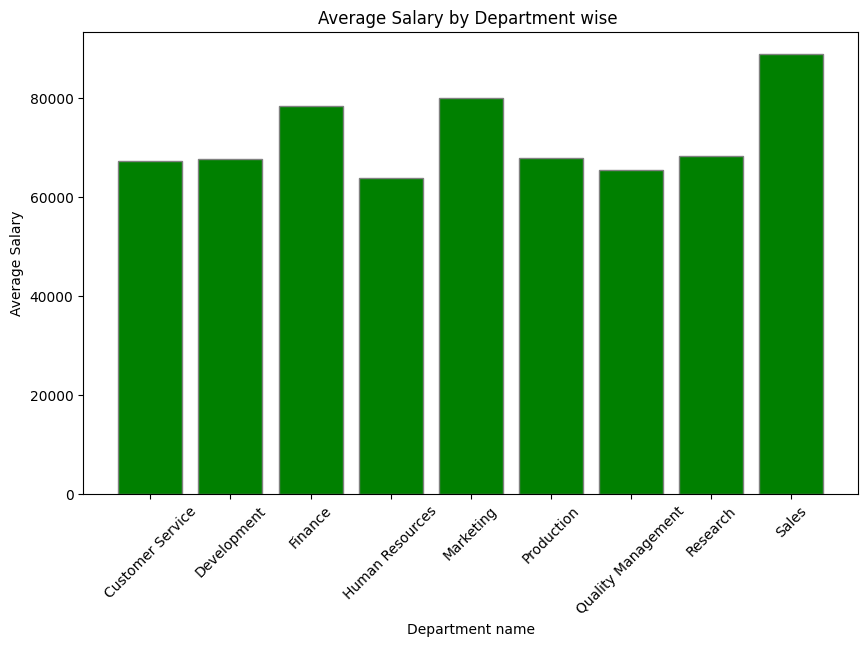


 ===========This department name has highest average salary===========



,dept_name,avg
8,Sales,88904.88619


In [7]:
get_department_wise_avg_salary()

### 3.Which title has the highest avg salary? Give some plots to show the avg salary title-wise.

In [8]:
def title_wise_avg_salary():
    conn = connect_to_DB()
    query = """ select tab1.title, avg(tab1.amount) from (select s.amount, t.title from employees.employee e
										 left join employees.title t on t.employee_id=e.id
										 left join employees.salary s on s.employee_id=e.id
										 where date_part('year', s.to_date) = 9999
										 and date_part('year',t.to_date) = 9999) tab1 group by tab1.title """
    avg_salary_with_title = pd.read_sql_query(query, conn)
    plt.figure(figsize=(10, 6))
    plt.bar(avg_salary_with_title.title, avg_salary_with_title.avg, edgecolor ='grey')
    plt.xlabel('Title')
    plt.ylabel('Average Salary')
    plt.title('Average Salary by Title ')
    plt.xticks(rotation=45)
    plt.show()
    print('\n ===========This title has highest average salary===========\n') 
    return avg_salary_with_title[avg_salary_with_title['avg'] == max(avg_salary_with_title['avg'])]

C:\Users\REAL\AppData\Local\Temp\ipykernel_6004\976569435.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_salary_with_title = pd.read_sql_query(query, conn)


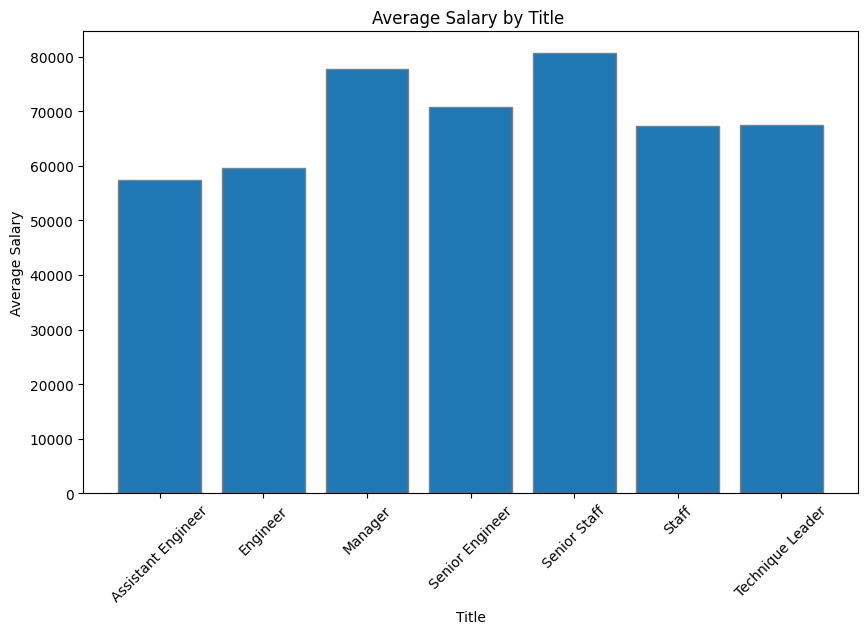


 ===========This title has highest average salary===========



,title,avg
4,Senior Staff,80581.387555


In [9]:
title_wise_avg_salary()

### 4. Distribution of salary across titles.

In [17]:
def salary_across_titles():
    conn = connect_to_DB()
    query = """ select ti.title, s.amount from employees.title ti
                left join employees.salary s on ti.employee_id = s.employee_id 
                where date_part('year', ti.to_date) = 9999 and date_part('year', s.to_date) = 9999
                group by ti.title, s.amount"""
    get_salary_across_titles = pd.read_sql_query(query, conn)   
    # Create a box plot to visualize the distribution of salary across titles
    plt.figure(figsize=(12, 8))
    plt.xticks(rotation=45)
    plt.xlabel('Title')
    plt.ylabel('Salary')
    plt.title('Distribution of Salary Across Titles')
    sns.boxplot(x='title', y='amount', data=get_salary_across_titles, color='green')
    plt.show()


C:\Users\REAL\AppData\Local\Temp\ipykernel_6004\3016248839.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  get_salary_across_titles = pd.read_sql_query(query, conn)


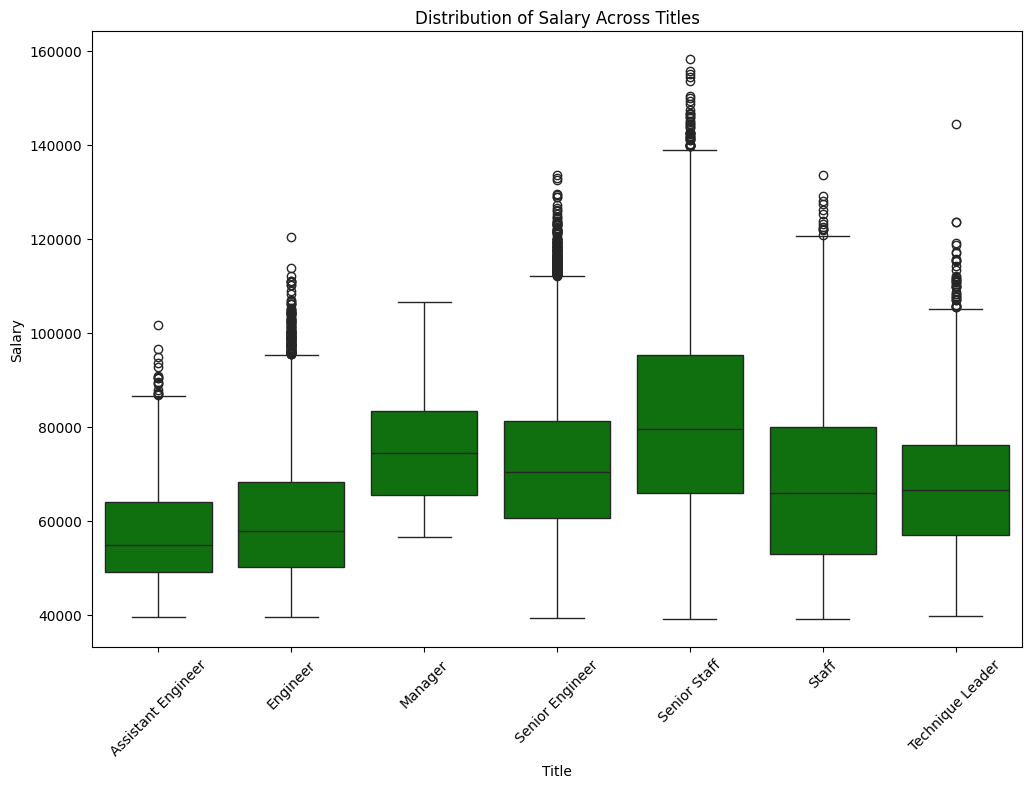

In [18]:
salary_across_titles()

### 5. Distribution of salary across departments.

In [10]:
def salary_across_department1():
    conn = connect_to_DB()
    query = """ select d.dept_name, s.amount from employees.salary s
            left join employees.department_employee de on s.employee_id = de.employee_id
            left join employees.department d on d.id = de.department_id
            where date_part('year', de.to_date) = 9999 and date_part('year', s.to_date) = 9999 """
    salary_department = pd.read_sql_query(query, conn)
    df = pd.DataFrame(salary_department)
    df.head()
    # Create a Seaborn box plot to visualize the distribution of salary across departments
    plt.figure(figsize=(12, 8))
    plt.xticks(rotation=45)
    plt.xlabel('Department')
    plt.ylabel('Salary')
    plt.title('Distribution of Salary Across Departments')
    sns.boxplot(x='dept_name', y='amount', data=salary_department, color='orange')
    plt.show()


C:\Users\REAL\AppData\Local\Temp\ipykernel_6004\2961707739.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_department = pd.read_sql_query(query, conn)


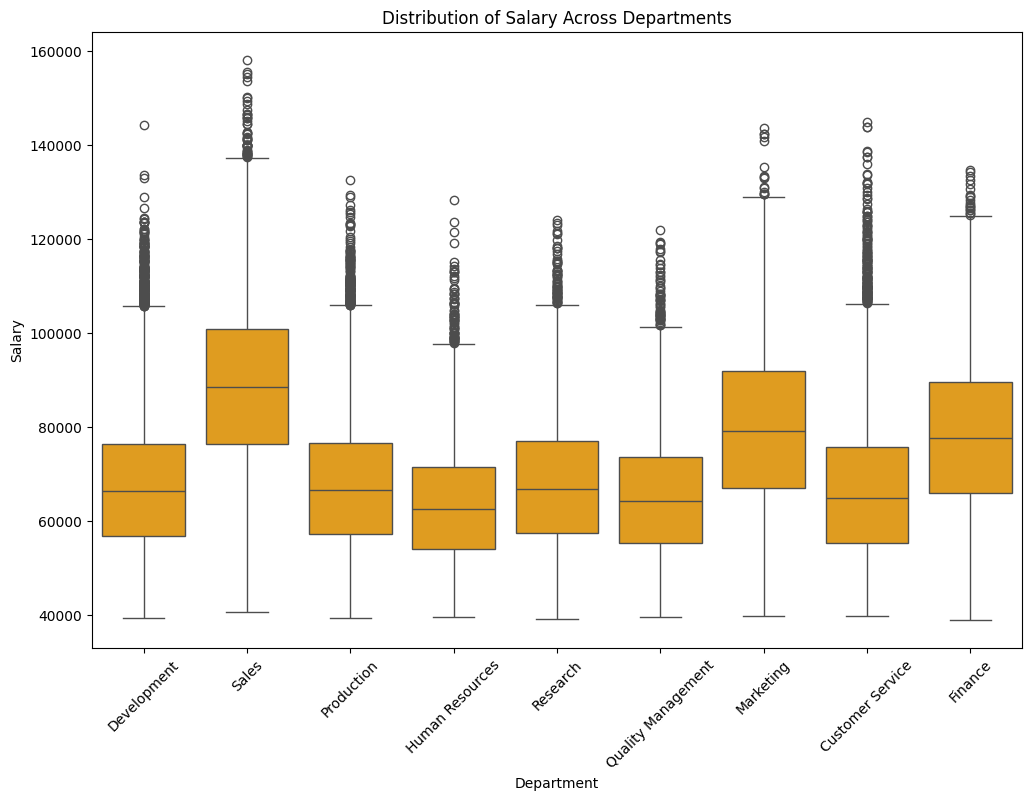

In [19]:
salary_across_department1()

### 6. How many active managers in each department. Is there any department with no manager?

In [10]:
def active_manager_in_department():
    conn = connect_to_DB()
    # SQL query to count active managers in each department
    query_active_mgr = """ select d.dept_name, count(dm.employee_id) as manager_counts from employees.department d
            left join employees.department_manager dm on d.id = dm.department_id
            left join employees.employee e on dm.employee_id = e.id
            where date_part('year', dm.to_date) = 9999
            group by d.dept_name """
    get_active_manager = pd.read_sql_query(query_active_mgr, conn)
    # Print the counts of active managers in each department
    print("Number of Active Managers in Each Department:")
    print(get_active_manager)
    # SQL query to check for departments with no manager
    department_with_no_mgr = """ select d.dept_name from employees.department d
                                left join employees.department_manager dm on d.id = dm.department_id
                                where dm.employee_id isnull """
    getdepartment_with_no_manager = pd.read_sql_query(department_with_no_mgr, conn)
    # Print whether there are departments with no manager
    if not getdepartment_with_no_manager.empty:
        print("\nDepartments with No Manager:")
        print(departments_without_manager_df)
    else:
        print("\nAll departments have at least one active manager.")


In [11]:
active_manager_in_department()

Number of Active Managers in Each Department:
            dept_name  manager_counts
0    Customer Service               1
1         Development               1
2             Finance               1
3     Human Resources               1
4           Marketing               1
5          Production               1
6  Quality Management               1
7            Research               1
8               Sales               1

All departments have at least one active manager.


C:\Users\REAL\AppData\Local\Temp\ipykernel_3052\3508789910.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  get_active_manager = pd.read_sql_query(query_active_mgr, conn)
C:\Users\REAL\AppData\Local\Temp\ipykernel_3052\3508789910.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  getdepartment_with_no_manager = pd.read_sql_query(department_with_no_mgr, conn)


### 7. Composition of titles department-wise. Appropriate plots.

In [20]:
def comp_titles_department_wise():
    conn = connect_to_DB()
    query = """ select d.dept_name, ti.title, count(*) as title_counts from employees.department_employee de
            join employees.department d on de.department_id = d.id
            join employees.employee e on de.employee_id = e.id
            join employees.title ti on e.id = ti.employee_id
            group by d.dept_name, ti.title
            order by d.dept_name, title_counts desc """
    df = pd.read_sql_query(query, conn)
    print(df)
    # Pivot the data for plotting
    pivot_df = df.pivot(index='dept_name', columns='title', values='title_counts').fillna(0)
    # Create a stacked bar chart to visualize the composition of titles department-wise
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.xlabel('Department names')
    plt.ylabel('Number of Employees')
    plt.title('Composition of Titles Department-Wise')
    plt.legend(title='Title', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\REAL\AppData\Local\Temp\ipykernel_3052\259131635.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


             dept_name               title  title_counts
0     Customer Service               Staff         16150
1     Customer Service        Senior Staff         13925
2     Customer Service            Engineer          2362
3     Customer Service     Senior Engineer          2027
4     Customer Service    Technique Leader           309
5     Customer Service  Assistant Engineer           298
6     Customer Service             Manager             4
7          Development            Engineer         58135
8          Development     Senior Engineer         49326
9          Development  Assistant Engineer          7769
10         Development    Technique Leader          7683
11         Development               Staff          1424
12         Development        Senior Staff          1247
13         Development             Manager             2
14             Finance               Staff         13929
15             Finance        Senior Staff         12139
16             Finance         

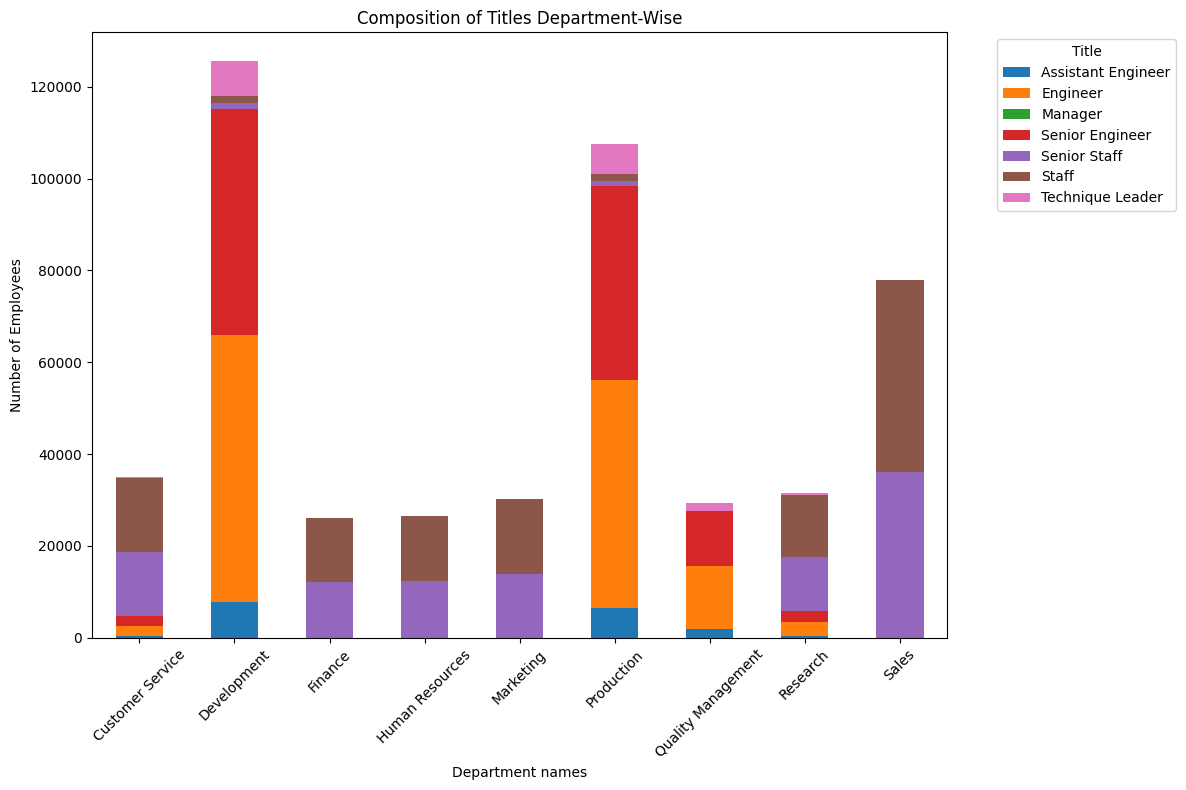

In [21]:
comp_titles_department_wise()

### 8. Composition of departments title-wise. Appropriate plots.

In [14]:
def comp_departments_title_wise():
    conn = connect_to_DB()
    query = """ select d.dept_name, ti.title, count(*) as title_counts from employees.department_employee de
            join employees.department d on de.department_id = d.id
            join employees.employee e on de.employee_id = e.id
            join employees.title ti on e.id = ti.employee_id
            group by d.dept_name, ti.title
            order by d.dept_name, title_counts desc """
    df = pd.read_sql_query(query, conn)
    # Pivot the data for plotting
    pivot_df = df.pivot(index='title', columns='dept_name', values='title_counts').fillna(0)

    # Create a stacked bar chart to visualize the composition of titles department-wise
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.xlabel('Titles')
    plt.ylabel('Number of Employees')
    plt.title('Composition of Departments Title-Wise')
    plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\REAL\AppData\Local\Temp\ipykernel_3052\2599489749.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


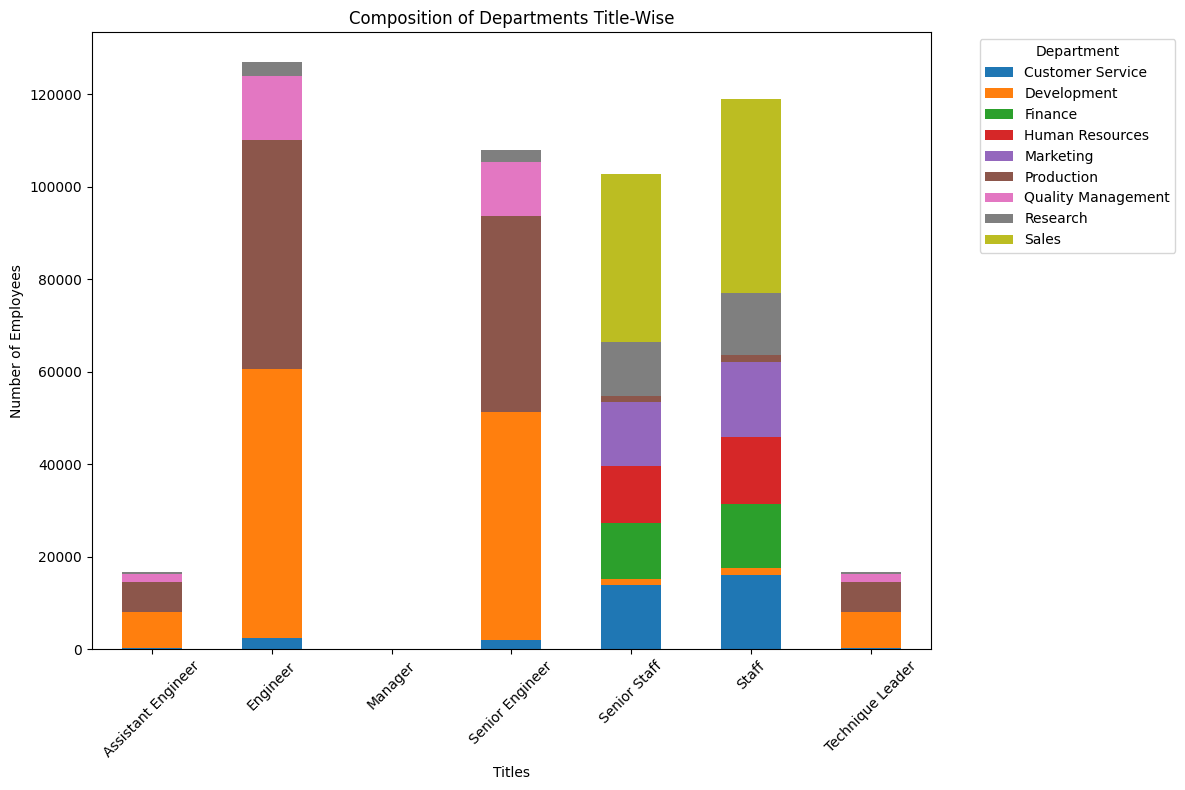

In [15]:
comp_departments_title_wise()

### 9. Salaries of active department managers. Which department's manager who is active earns the most?

In [9]:
def active_dept_manager_salary():
    conn = connect_to_DB()
    query = """ select d.dept_name, s.amount from employees.department_manager dm
            inner join employees.salary s on dm.employee_id = s.employee_id
            inner join employees.department d on d.id = dm.department_id
            where dm.to_date = '9999-01-01' and s.to_date = '9999-01-01' """
    get_active_manager_salary = pd.read_sql_query(query, conn)
    plt.figure(figsize=(12, 8))
    plt.xticks(rotation=45)
    plt.xlabel('Department name')
    plt.ylabel('Salary')
    plt.title('Salaries of active department manager')
    sns.barplot(x= get_active_manager_salary['dept_name'], y= get_active_manager_salary['amount'])
    plt.show()
    #for i in plot.get_xticklabels():
        #i.set_rotation(45)
    print('\n =============Department manager who is active earns the most=============\n')                 
    return get_active_manager_salary[get_active_manager_salary['amount'] == max(get_active_manager_salary['amount'])]

C:\Users\REAL\AppData\Local\Temp\ipykernel_13148\1761018694.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  get_active_manager_salary = pd.read_sql_query(query, conn)


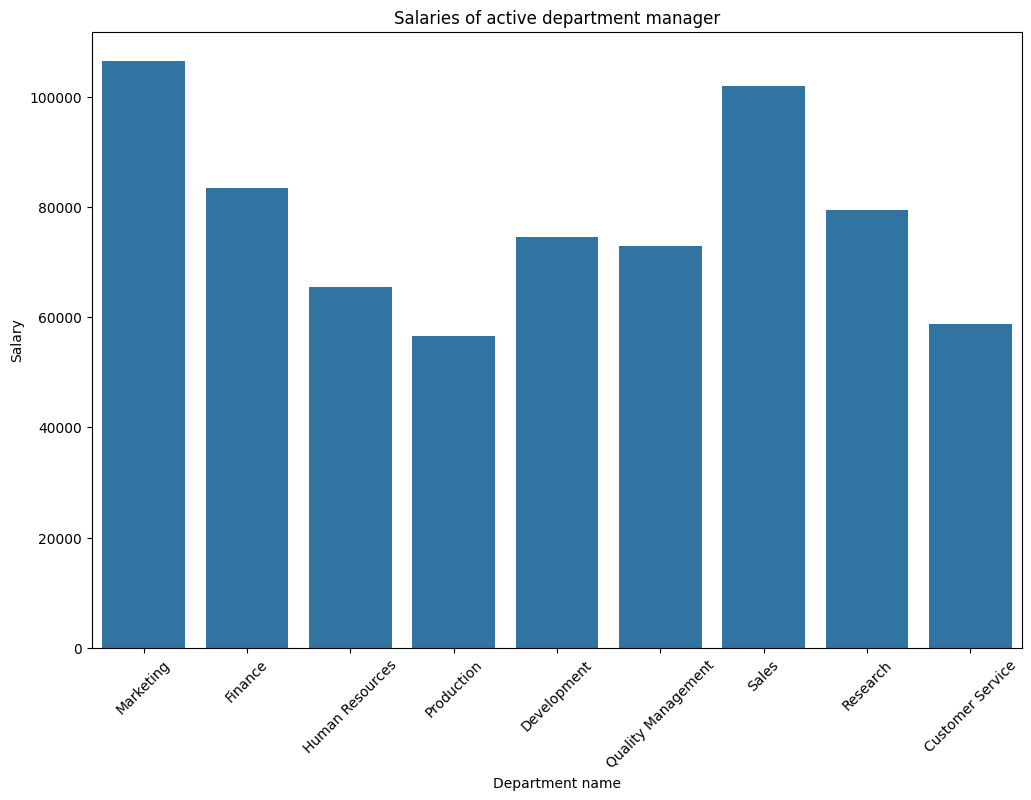


 =============Department manager who is active earns the most=============



,dept_name,amount
0,Marketing,106491


In [10]:
active_dept_manager_salary()

### 10. What are the titles of active department managers? Are they managers only?

In [6]:
def titles_active_dept_manager():
    conn = connect_to_DB()
    query = """ select d.dept_name, tit.title from employees.department_manager dm
            join employees.title tit on dm.employee_id = tit.employee_id
            join employees.department d on d.id = dm.Department_id
            where date_part('year', dm.to_date) = 9999 and date_part('year', tit.to_date) = 9999 """
    get_active_depmgr_title = pd.read_sql_query(query, conn)
    df = pd.DataFrame(get_active_depmgr_title)
    print(df.head())
    print('\n Check if there are any titles other than manager :- \n')
    only_managers = get_active_depmgr_title['title'].nunique() == 1
    if only_managers:
        print("All active department managers have the title 'manager'.")
    else:
        print("Active department managers have titles other than 'manager' as well.")


In [7]:
titles_active_dept_manager()

         dept_name    title
0        Marketing  Manager
1          Finance  Manager
2  Human Resources  Manager
3       Production  Manager
4      Development  Manager

 Check if there are any titles other than manager :- 

All active department managers have the title 'manager'.


C:\Users\REAL\AppData\Local\Temp\ipykernel_3052\854490056.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  get_active_depmgr_title = pd.read_sql_query(query, conn)


### 11. Past history of salaries of managers across department (yearly)

In [11]:
def past_manager_salary():
    conn = connect_to_DB()
    query = """ select dm.employee_id as manager_id, d.dept_name, s.amount as salary, s.from_date, s.to_date 
            from employees.department_manager dm join employees.salary s on dm.employee_id = s.employee_id
            join employees.department d on dm.department_id = d.id
            where s.from_date >= dm.from_date and s.to_date <= dm.to_date """
    df = pd.read_sql_query(query, conn)
    df['labels'] = df['from_date'].apply(str) + " to " + df['to_date'].apply(str)
    department = df['dept_name'].unique()
    employees_maanger = df['manager_id'].unique()
    for i in department:
        for j in employees_maanger:
            new_df = df[(df['dept_name']==i) & (df['manager_id']==j)]
            if not new_df.empty:
                plot = sns.barplot(x = new_df['labels'], y = new_df['salary'])
                for item in plot.get_xticklabels():
                    item.set_rotation(90)
                plt.title(i+str(j))
                plt.show()
            else:
                continue

C:\Users\REAL\AppData\Local\Temp\ipykernel_5912\2861482314.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


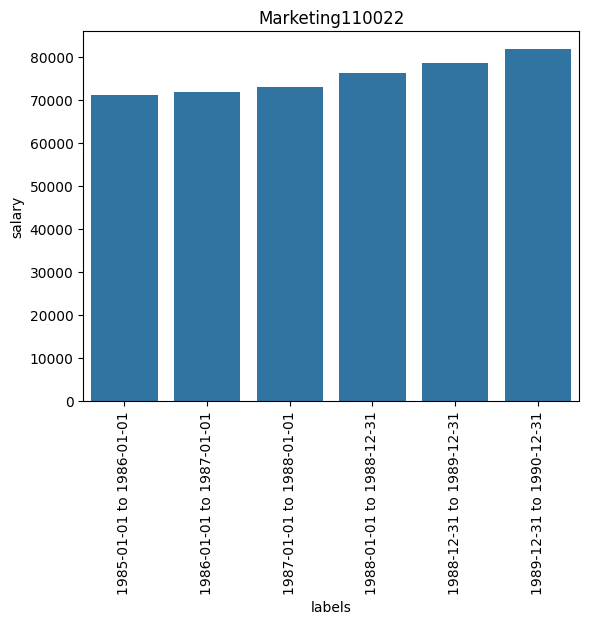

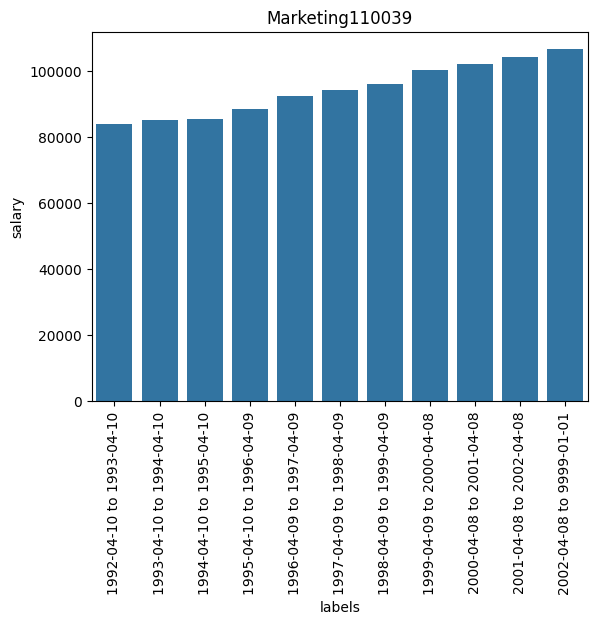

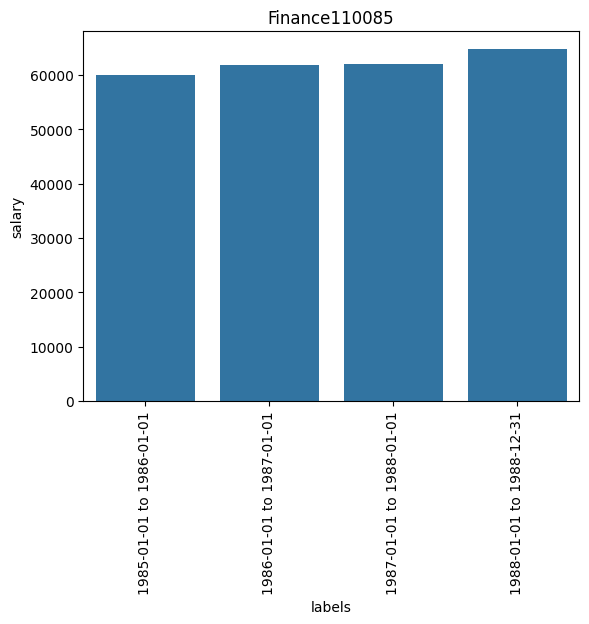

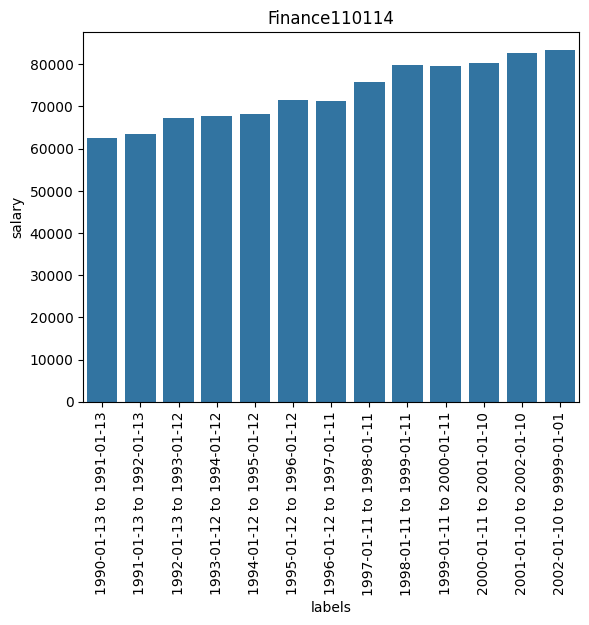

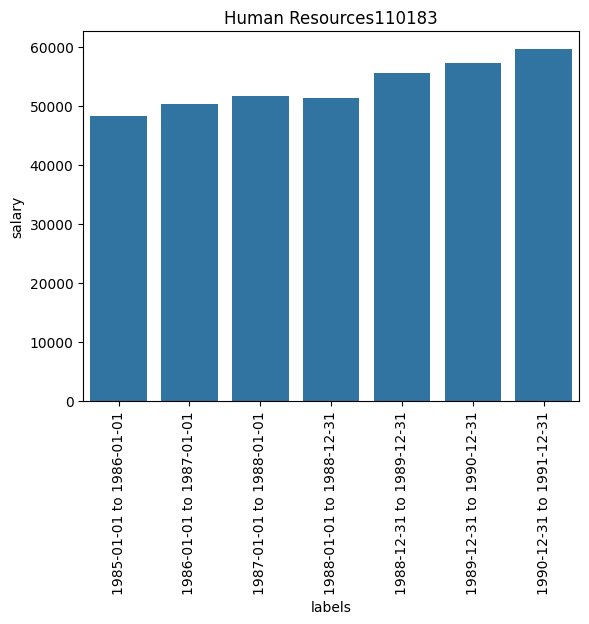

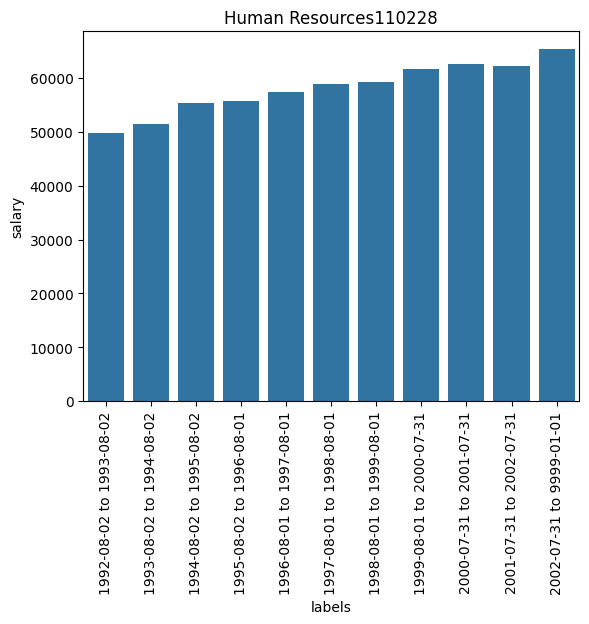

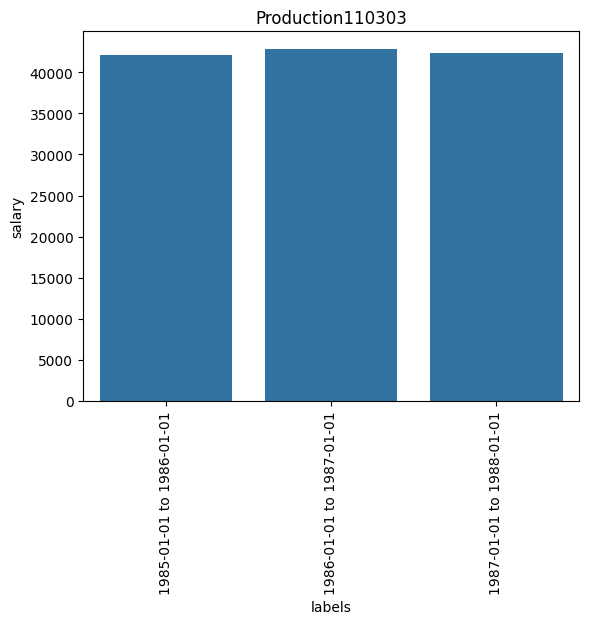

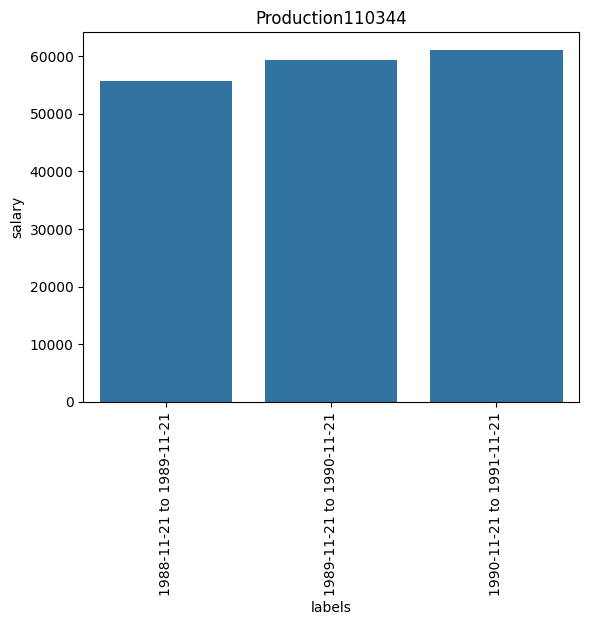

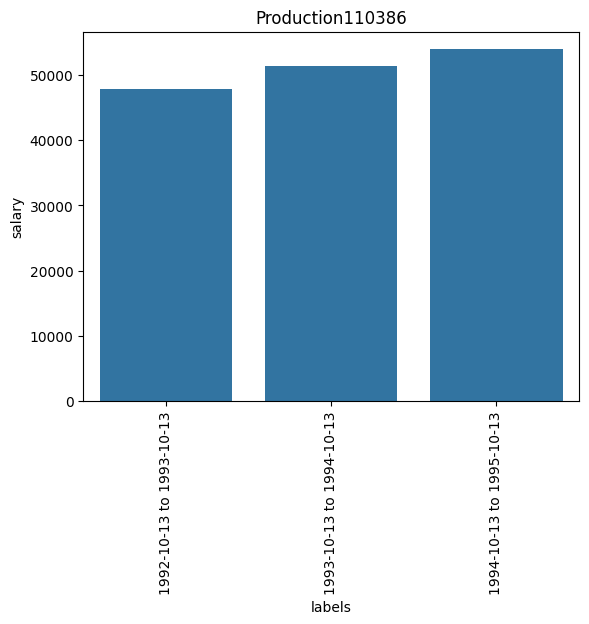

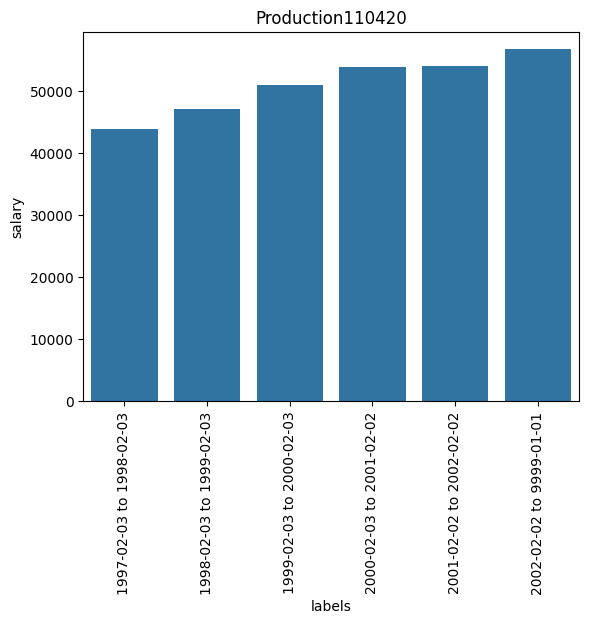

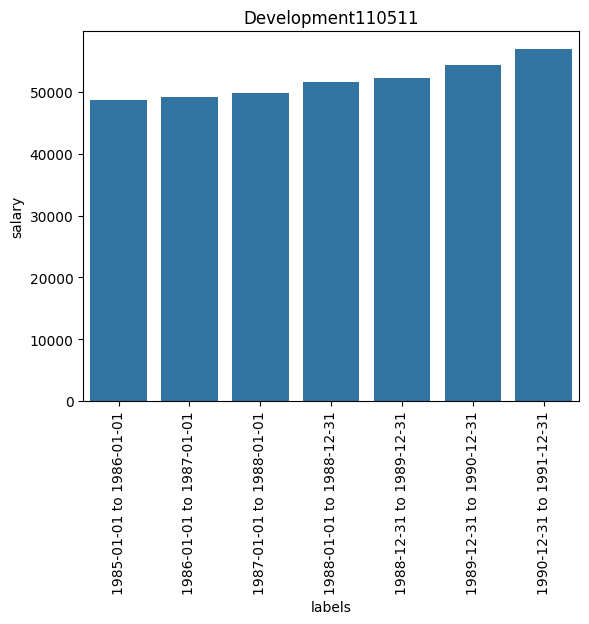

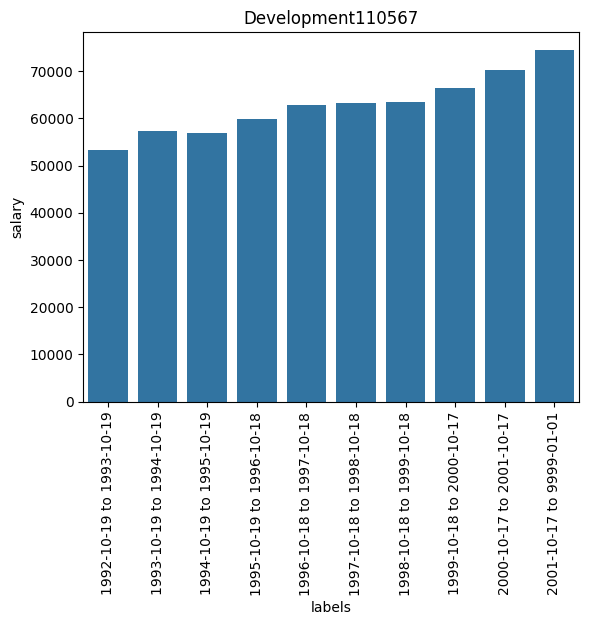

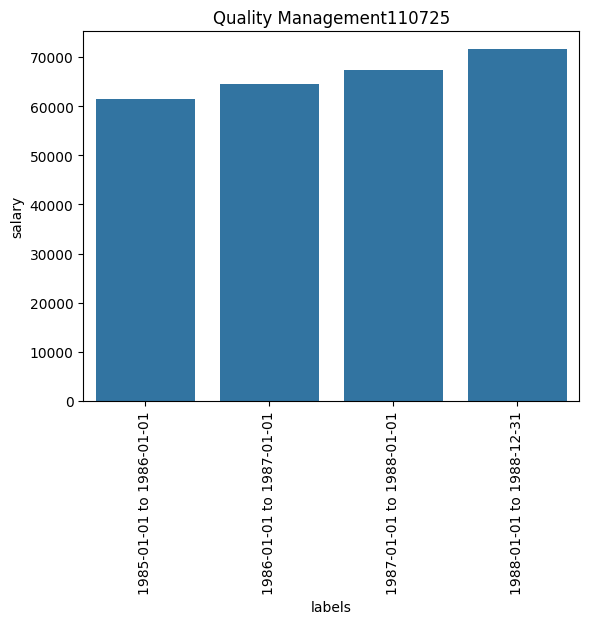

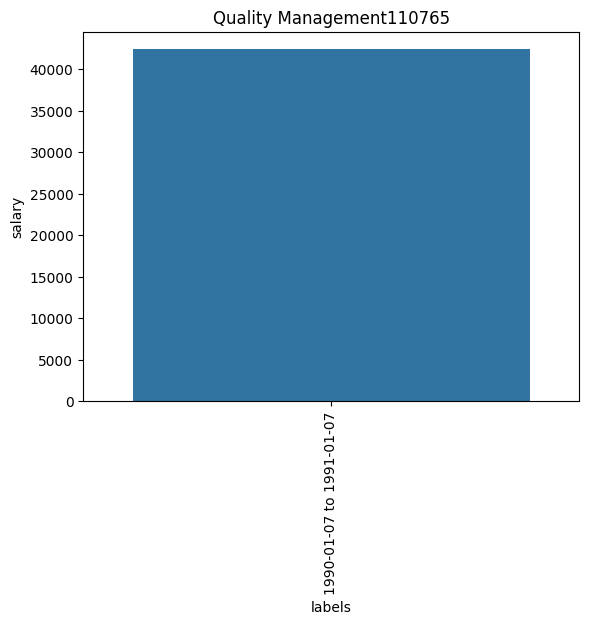

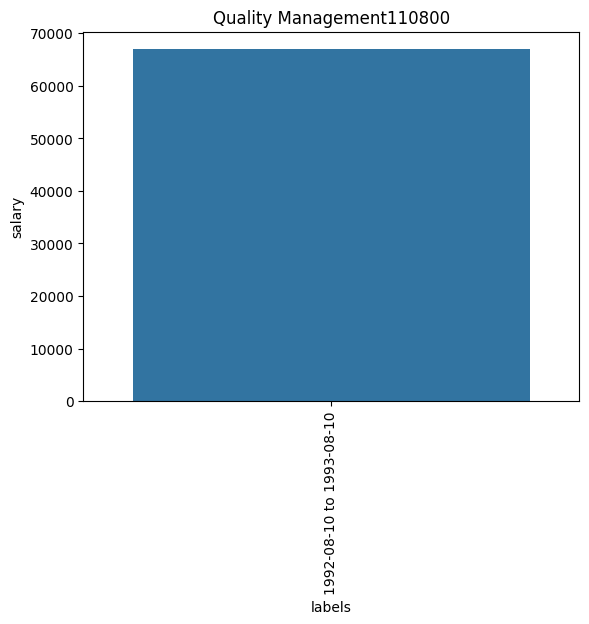

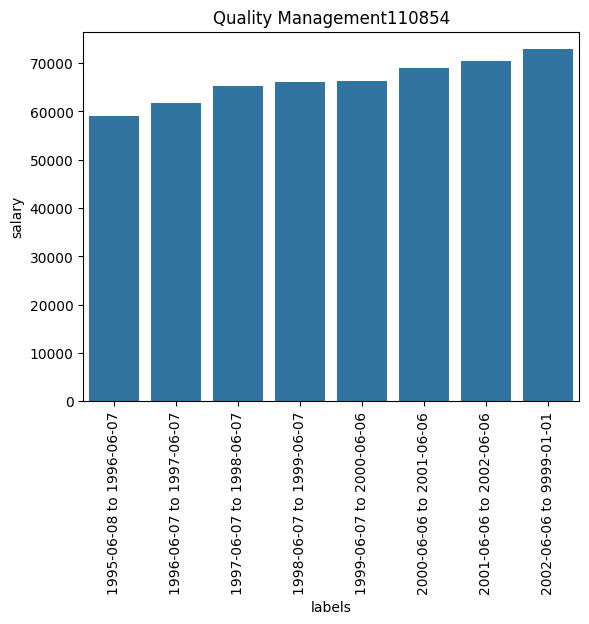

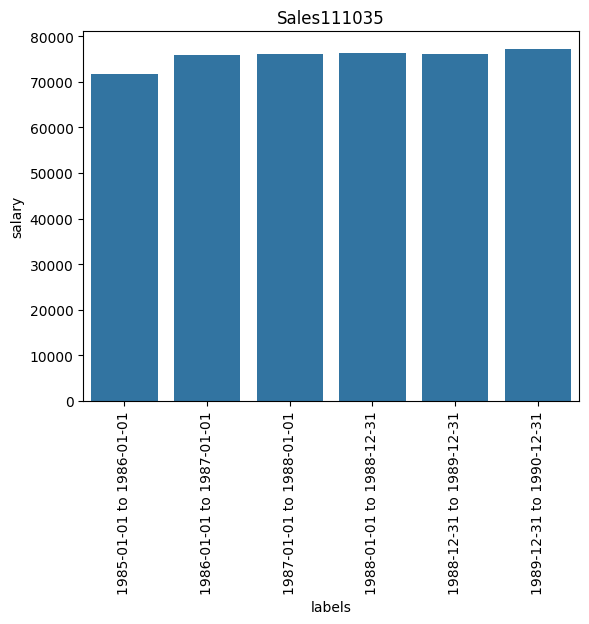

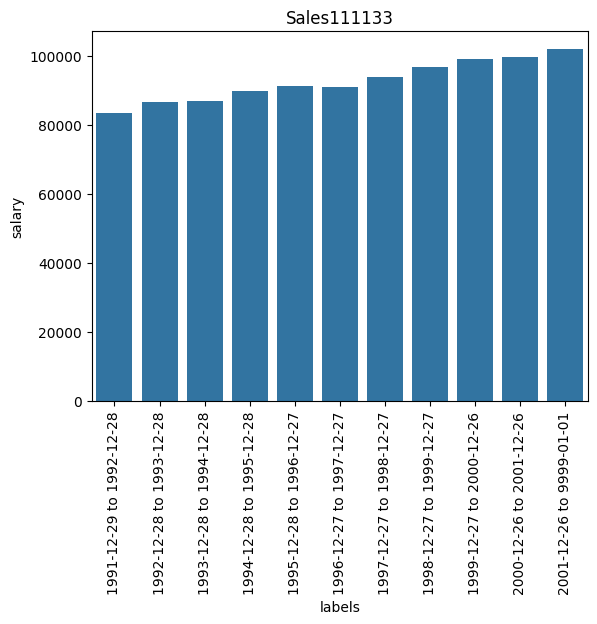

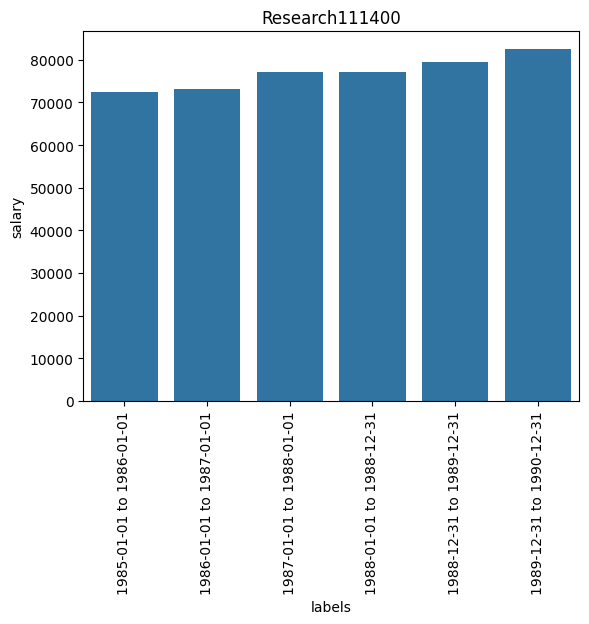

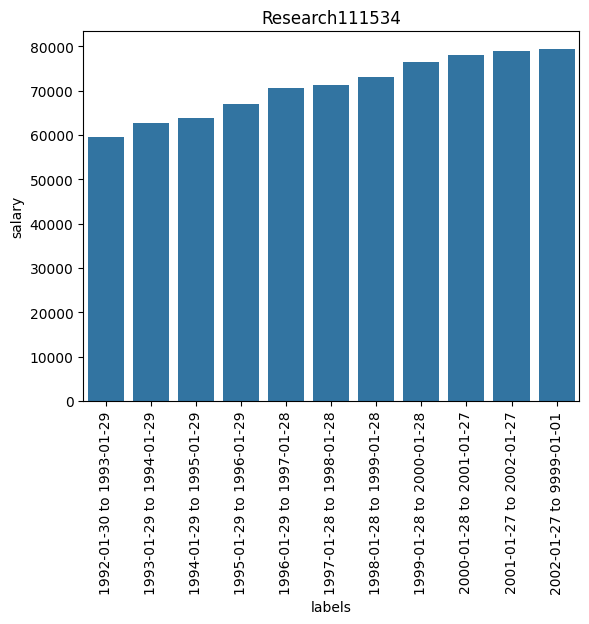

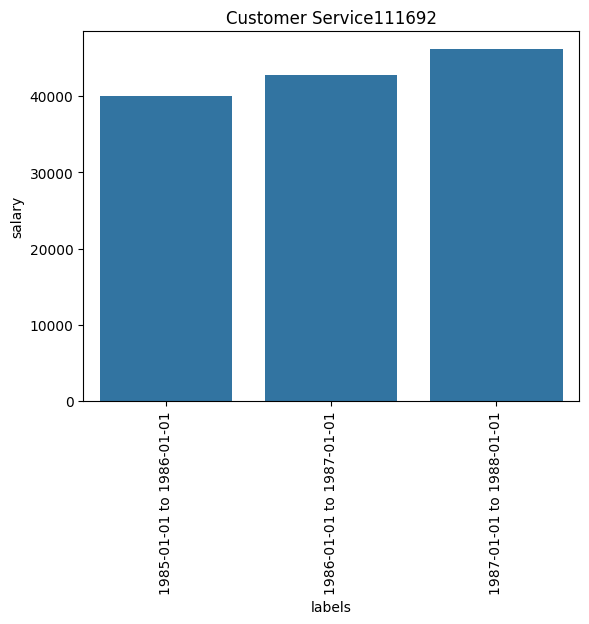

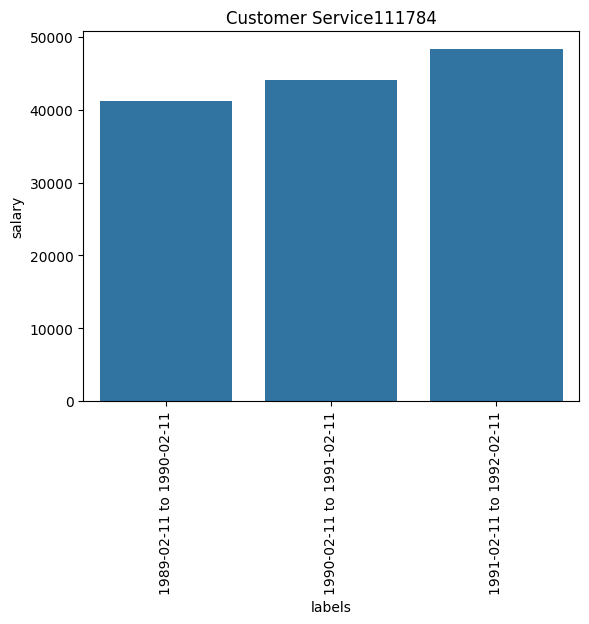

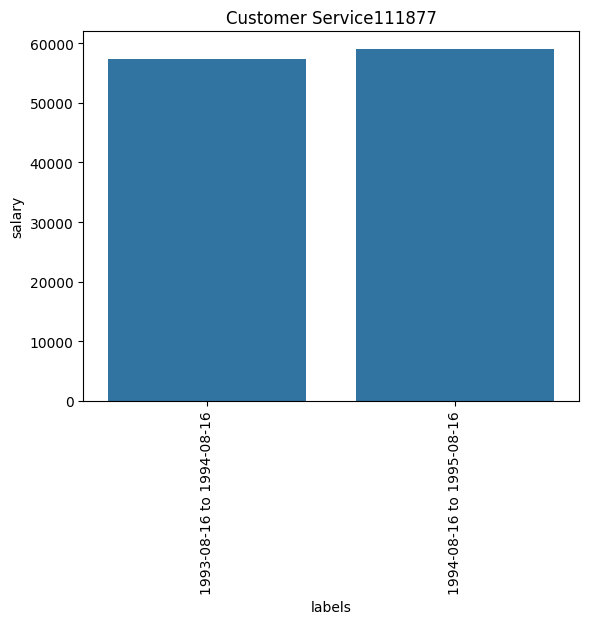

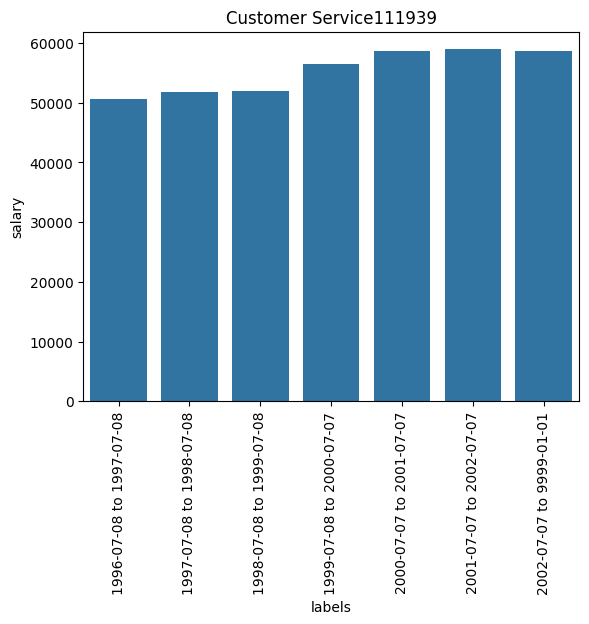

In [12]:
past_manager_salary()

### 12. Distribution of salaries of active employees working for more than 10 years vs 4 years vs 1 year.

In [7]:
def get_salary_dist_expwise():
    conn = connect_to_DB()
    query = """ with active_employee as (
                	select e.id, s.amount as salary, date_part('year', de.to_date) - date_part('year', e.hire_date) as year_of_experience
                	from employees.employee e join employees.department_employee de on e.id = de.employee_id
                	join employees.salary s on e.id = s.employee_id
                	where s.to_date = '9999-01-01' and date_part('year', de.to_date) - date_part('year', e.hire_date) <= 60
                )
                select 
                	case
                		when year_of_experience > 10 then 'More than 10 years'
                    	when year_of_experience > 4 then '4 to 10 years'
                    	when year_of_experience >= 1 then ' 1 to 4 years'
                        else 'Less than 1 year experience'
                    end as service_category,
                	salary
                from active_employee  """
    df = pd.read_sql_query(query, conn)
    print(df.head())
    # Create a histogram to visualize the salary distribution for each service category
    plt.figure(figsize=(12, 8))
    for category, data in df.groupby('service_category'):
        plt.hist(data['salary'], bins=20, alpha=0.7, label=category)

    plt.xlabel('Salary')
    plt.ylabel('Frequency')
    plt.title('Salary Distribution of Active Employees by Years of Service')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

C:\Users\REAL\AppData\Local\Temp\ipykernel_5912\2528016940.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


              service_category  salary
0           More than 10 years   80324
1  Less than 1 year experience   66419
2                4 to 10 years   84672
3           More than 10 years   72497
4           More than 10 years   77777


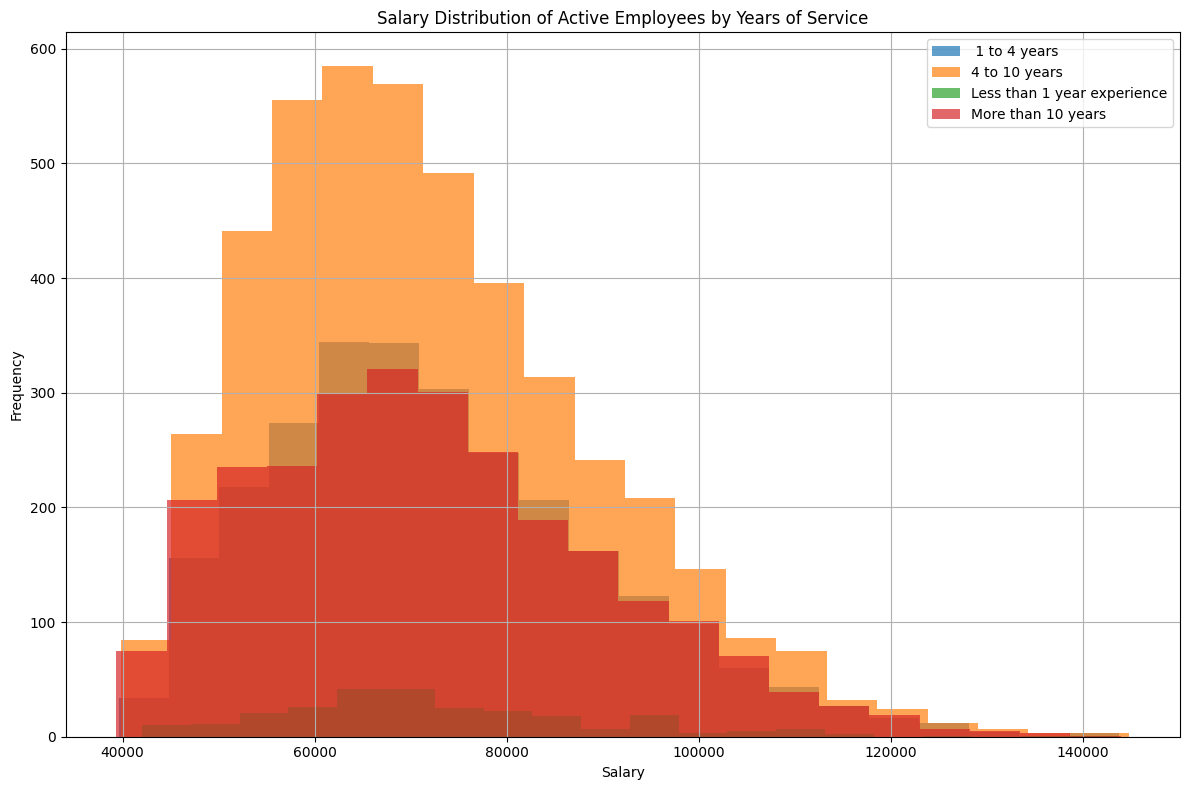

In [8]:
get_salary_dist_expwise()

### 13.Average number of years employees work in the company before leaving (title wise)

In [4]:
def avg_noOf_years_employee_work():
    conn = connect_to_DB()
    query = """ select ti.title,  avg(date_part('year',ti.to_date) - date_part('year',e.hire_date)) AS avg_years_before_leaving
            from employees.employee e join employees.title ti
            on e.id = ti.employee_id
            where date_part('year', ti.to_date) != 9999
            group by ti.title """
    df = pd.read_sql_query(query,conn)
    print(df.head(10))
    # Create a Seaborn bar plot to visualize the average number of years worked before leaving, title-wise
    plt.figure(figsize=(12, 8))
    sns.barplot(x='avg_years_before_leaving', y='title', data=df, palette='viridis')
    plt.xlabel('Average Years Before Leaving')
    plt.ylabel('Title')
    plt.title('Average Number of Years Employees Worked Before Leaving (Title-Wise)')
    plt.tight_layout()
    plt.show()
    

C:\Users\REAL\AppData\Local\Temp\ipykernel_8080\4193683097.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query,conn)


                title  avg_years_before_leaving
0  Assistant Engineer                  7.646534
1            Engineer                  7.845882
2             Manager                  5.333333
3     Senior Engineer                  9.014986
4        Senior Staff                  9.127251
5               Staff                  7.681512
6    Technique Leader                  7.259021


C:\Users\REAL\AppData\Local\Temp\ipykernel_8080\4193683097.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_years_before_leaving', y='title', data=df, palette='viridis')


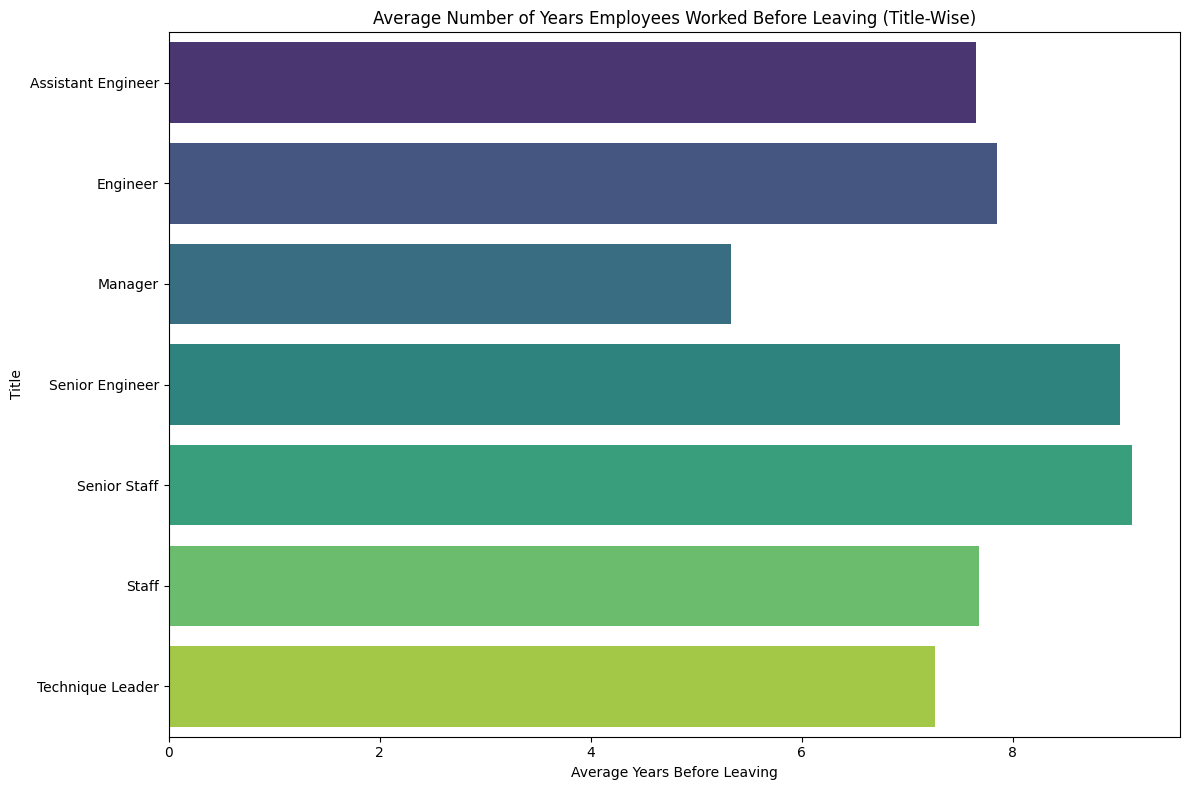

In [5]:
avg_noOf_years_employee_work()

### 14. Average number of years employees work in the company before leaving (Dept wise).

In [6]:
def avg_noOf_years_employee_work():
    conn = connect_to_DB()
    query = """ select d.dept_name, avg(date_part('year',de.to_date) - date_part('year',e.hire_date)) as average_years_before_leaving
                from employees.employee e join employees.department_employee de
                on e.id = de.employee_id
                join employees.department d on de.department_id = d.id
                where date_part('year', de.to_date) !=9999
                group by d.dept_name """
    df = pd.read_sql_query(query,conn)
    print(df.head(10))
    # Create a Matplotlib bar plot to visualize the average number of years worked before leaving, department-wise
    plt.figure(figsize=(12, 8))
    plt.barh(df['dept_name'], df['average_years_before_leaving'], color='skyblue')
    plt.xlabel('Average Years Before Leaving')
    plt.ylabel('Department')
    plt.title('Average Number of Years Employees Worked Before Leaving (Department-Wise)')
    plt.tight_layout()
    plt.show()

C:\Users\REAL\AppData\Local\Temp\ipykernel_8080\4056373544.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query,conn)


            dept_name  average_years_before_leaving
0    Customer Service                      7.326734
1         Development                      7.178611
2             Finance                      7.225300
3     Human Resources                      7.159779
4           Marketing                      7.133358
5          Production                      7.227144
6  Quality Management                      7.264046
7            Research                      7.211434
8               Sales                      7.233980


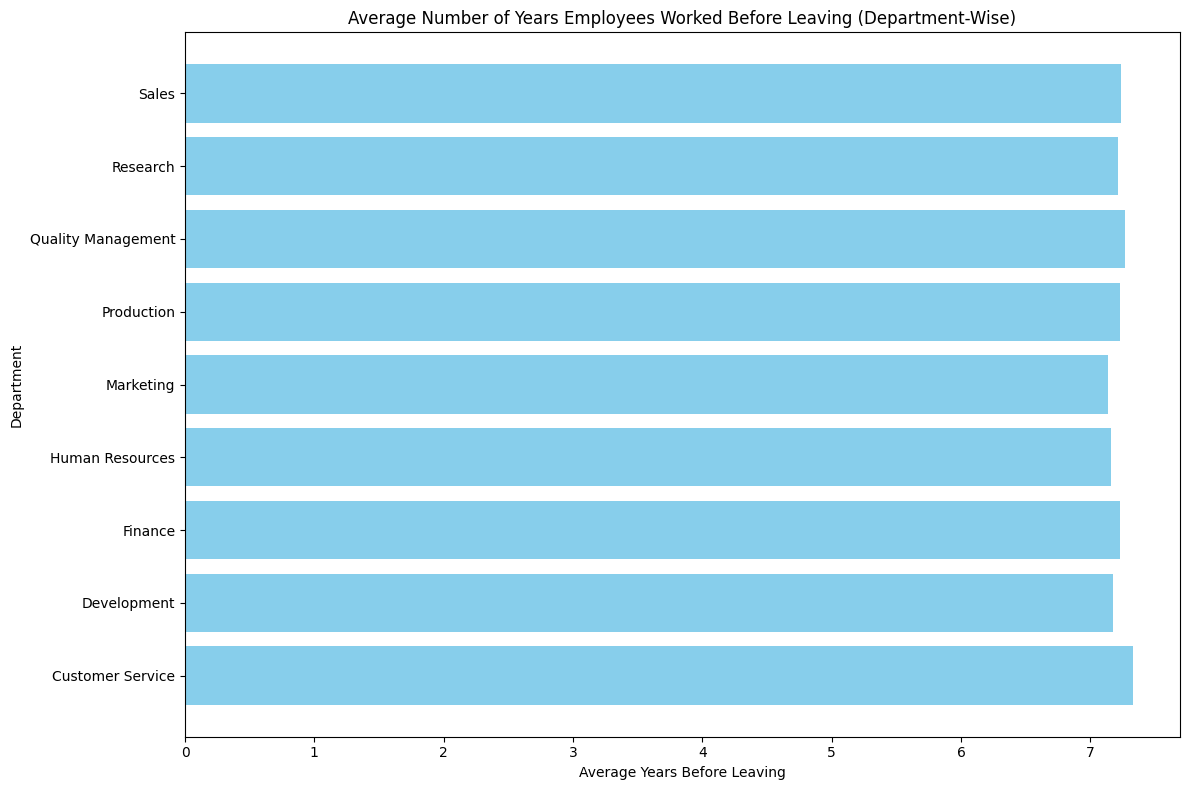

In [7]:
avg_noOf_years_employee_work()

### 15. Median annual salary increment department wise.

In [10]:
def median_salary_incr_deptwise():
    conn = connect_to_DB()
    query = """ with salary_increment as 
                    (select d.dept_name, date_part('year', s.from_date) as start, 
                    date_part('year', s.to_date) as end, max(s.amount) - min(s.amount) as annual_increment
                    from employees.department d join employees.department_employee de 
                    on d.id = de.department_id
                    join employees.salary s on de.employee_id =s.employee_id
                    group by d.dept_name, date_part('year', s.from_date), date_part('year', s.to_date))
                select dept_name, percentile_cont(0.5) WITHIN GROUP (ORDER BY annual_increment) as median_annual_salary_increment
                from salary_increment 
                group by dept_name
                order by median_annual_salary_increment """
    df = pd.read_sql_query(query, conn)
    print(df)
    # Create a Seaborn bar plot to visualize the median annual salary increments department-wise
    plt.figure(figsize=(12, 8))
    sns.barplot(x='median_annual_salary_increment', y='dept_name', data=df, palette='viridis')
    plt.xlabel('Median Annual Salary Increment')
    plt.ylabel('Department')
    plt.title('Median Annual Salary Increment by Department')
    plt.tight_layout()
    plt.show()

C:\Users\REAL\AppData\Local\Temp\ipykernel_8080\1587924791.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


            dept_name  median_annual_salary_increment
0  Quality Management                         57459.0
1     Human Resources                         61356.5
2            Research                         62709.0
3          Production                         65290.0
4         Development                         67305.0
5    Customer Service                         72352.0
6             Finance                         73573.0
7           Marketing                         76386.0
8               Sales                         89566.0


C:\Users\REAL\AppData\Local\Temp\ipykernel_8080\1587924791.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='median_annual_salary_increment', y='dept_name', data=df, palette='viridis')


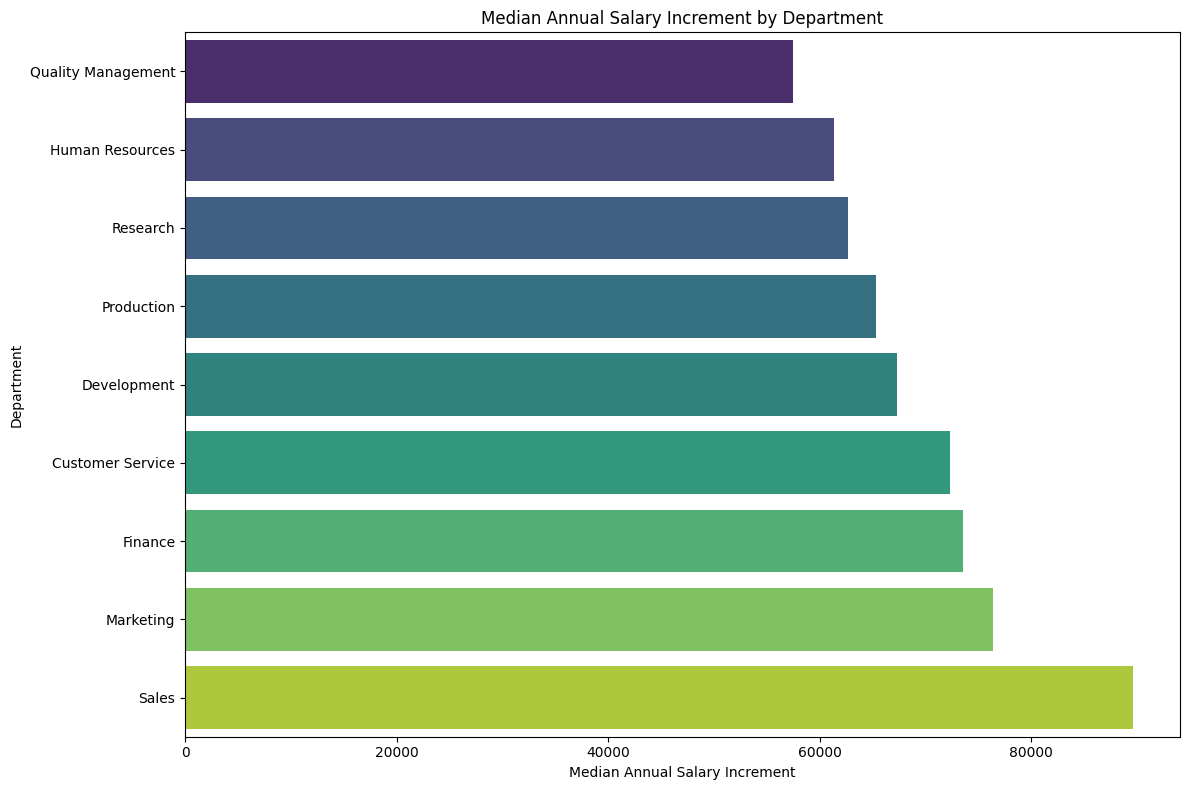

In [11]:
median_salary_incr_deptwise()

### 16. Retrieve employees who are also managers.


In [13]:
def employee_also_manager():
    conn = connect_to_DB()
    query = """ select d.dept_name as department, de.employee_id as employee_id, e.first_name as employee_name
            from employees.employee e join employees.department_employee de on e.id = de.employee_id
            join employees.department d on d.id = de.department_id
            where de.employee_id in (select distinct dm.employee_id from employees.department_manager dm) """
    df = pd.read_sql_query(query, conn)
    print(df)

In [14]:
employee_also_manager()

            department  employee_id employee_name
0                Sales       111035   Przemyslawa
1            Marketing       110022     Margareta
2      Human Resources       110228       Karsten
3   Quality Management       110765        Rutger
4     Customer Service       111692         Tonny
5   Quality Management       110725     Peternela
6           Production       110344        Rosine
7             Research       111534        Hilary
8                Sales       111133         Hauke
9              Finance       110085          Ebru
10         Development       110567          Leon
11    Customer Service       111784         Marjo
12    Customer Service       111939       Yuchang
13          Production       110386          Shem
14             Finance       110114         Isamu
15          Production       110420         Oscar
16         Development       110511      DeForest
17           Marketing       110039      Vishwani
18          Production       110303     Krassimir


C:\Users\REAL\AppData\Local\Temp\ipykernel_5912\1468283617.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


### 17. Average salaries with department wise and appropritae plot. Find employees who earn more than their department's average salary.


In [32]:
def employee_earn_more_than_avgSalary():
    conn = connect_to_DB()
    dept_with_average_salary = """ select d.dept_name as department, avg(s.amount) as average_salary
                                from employees.department d left join employees.department_employee de 
                                on d.id = de.department_id
                                left join employees.salary s on de.employee_id = s.employee_id
                                where de.to_date = '9999-01-01' and s.to_date = '9999-01-01' 
                                group by d.dept_name"""
    get_dept_with_average_salary = pd.read_sql_query(dept_with_average_salary, conn)
    print(get_dept_with_average_salary)
    plt.figure(figsize=(12, 8))
    sns.barplot(x = 'department', y = 'average_salary', data = get_dept_with_average_salary, color = 'orange')
    plt.xlabel('Department')
    plt.ylabel('Average salaries')
    plt.title('Average salaries department wise')
    plt.show()
    employee_earn_more_than_deptAvg_salary =""" select e.first_name as employee_name, s.amount as salary, d.dept_name as department_name
                                            from employees.employee e
                                            join employees.department_employee de ON e.id = de.employee_id
                                            join employees.department d ON de.department_id = d.id
                                            join employees.salary s on de.employee_id = s.employee_id
                                            where s.to_date = '9999-01-01' and de.to_date = '9999-01-01'
                                            group by e.first_name, s.amount, d.dept_name
                                            having s.amount > avg(s.amount) """
    df = pd.read_sql_query(employee_earn_more_than_deptAvg_salary, conn)
    if df.empty:
        print('No one earn more then department average salary as a department employee\n')
        print(df)
    else:
        print('Name of the department employee who earn more than department average salary')
        print(df)

C:\Users\REAL\AppData\Local\Temp\ipykernel_4740\853201710.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  get_dept_with_average_salary = pd.read_sql_query(dept_with_average_salary, conn)


           department  average_salary
0    Customer Service    67237.329277
1         Development    67701.022360
2             Finance    78302.244837
3     Human Resources    63749.025128
4           Marketing    79959.779397
5          Production    67823.744509
6  Quality Management    65459.301255
7            Research    68186.738842
8               Sales    88904.886190


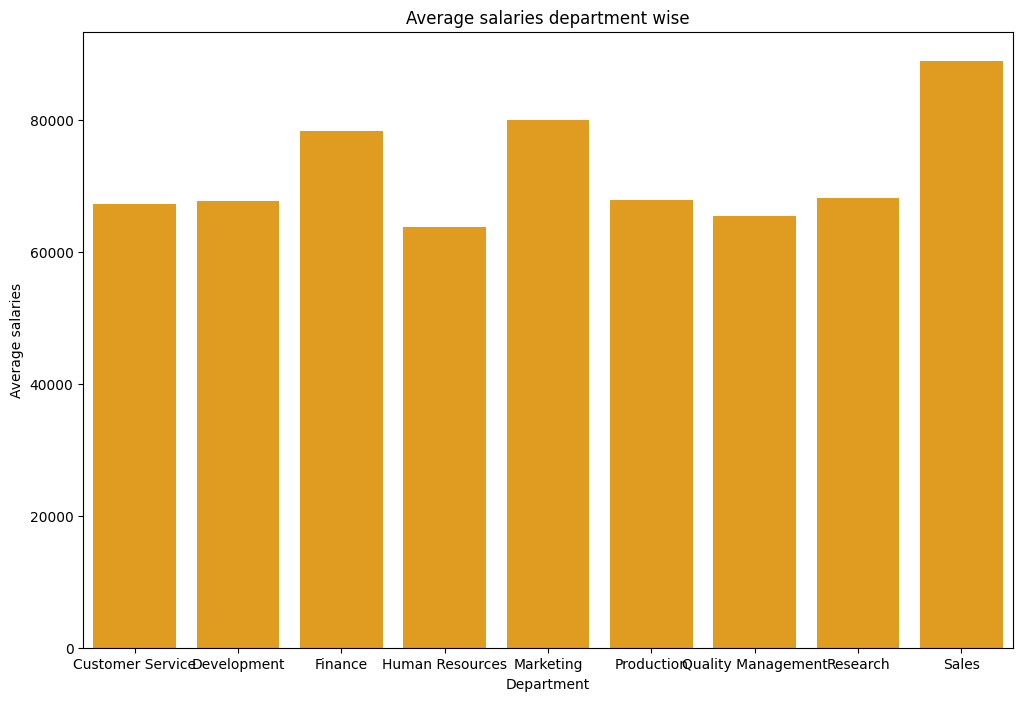

C:\Users\REAL\AppData\Local\Temp\ipykernel_4740\853201710.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(employee_earn_more_than_deptAvg_salary, conn)


No one earn more then department average salary as a department employee

Empty DataFrame
Columns: [employee_name, salary, department_name]
Index: []


In [33]:
employee_earn_more_than_avgSalary()

### 18. Find the employee(s) with the highest salary in each department.


In [10]:
def employee_highest_salary_inEach_department():
    conn = connect_to_DB()
    query = """ select department, employee_id, employee_name, salary
            from (
            	select d.dept_name as department, e.id as employee_id, e.first_name as employee_name, s.amount as salary, 
                     row_number() over (partition by d.dept_name order by s.amount desc) as ranking
            	from employees.employee e join employees.department_employee de 
            	on e.id = de.employee_id join employees.salary s
            	on de.employee_id = s.employee_id
            	join employees.department d on de.department_id = d.id
            ) ranked_employees
            where ranking = 1 """
    df = pd.read_sql_query(query, conn)
    print(df)
    # Create a bar chart to visualize employees with the highest salary in each department
    plt.figure(figsize=(12, 8))
    plt.bar(df['department'], df['salary'])
    plt.xlabel('Department Name')
    plt.ylabel('Salary')
    plt.title('Employees with Highest Salary in Each Department')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

C:\Users\REAL\AppData\Local\Temp\ipykernel_11860\3010251070.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


           department  employee_id employee_name  salary
0    Customer Service        18006         Vidya  144866
1         Development        13386       Khosrow  144434
2             Finance        28124       Adhemar  134662
3     Human Resources       216867        Kannan  128308
4           Marketing        89825        Ingmar  143644
5          Production       107632        Fumino  132552
6  Quality Management        73644     Eberhardt  122376
7            Research        34947         Mario  124181
8               Sales        43624      Tokuyasu  158220


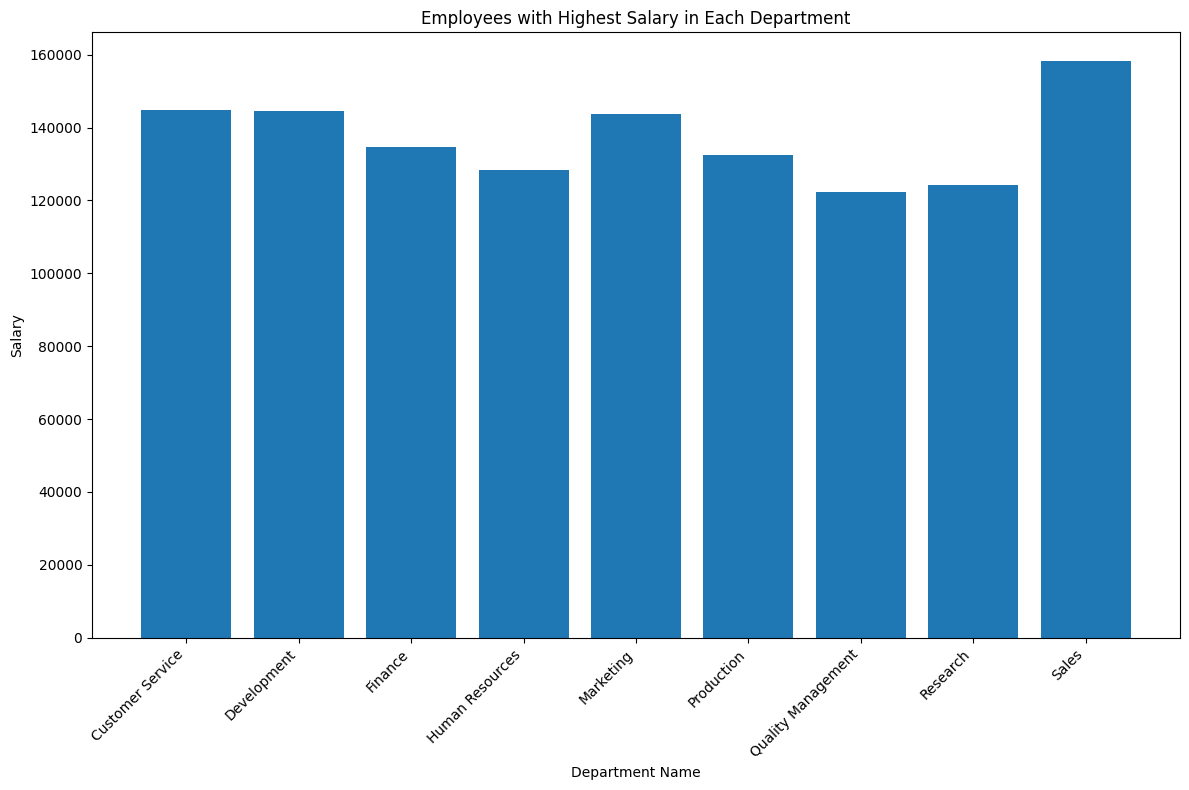

In [11]:
employee_highest_salary_inEach_department()